In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the CSV file and convert the data to a NumPy array
data = pd.read_csv('linear_regression_multivariate.csv')
data = data.to_numpy()

In [23]:
features = data[:, 0:-1]
labels = data[:, -1]

Linear Regression for 1 sample

In [24]:
x = np.hstack((np.ones((features.shape[0], 1)), features))
y = labels

theta = np.random.rand(x.shape[1])
lr = 0.01

losses = []
for _ in range(100):
    epoch_loss = 0
    for i in range(x.shape[0]):
        y_hat = np.dot(x[i], theta)
        loss = (y_hat - y[i]) ** 2
        epoch_loss += loss
        dtheta = 2 * (y_hat - y[i]) * x[i]
        theta = theta - lr * dtheta
    losses.append((epoch_loss / x.shape[0]))

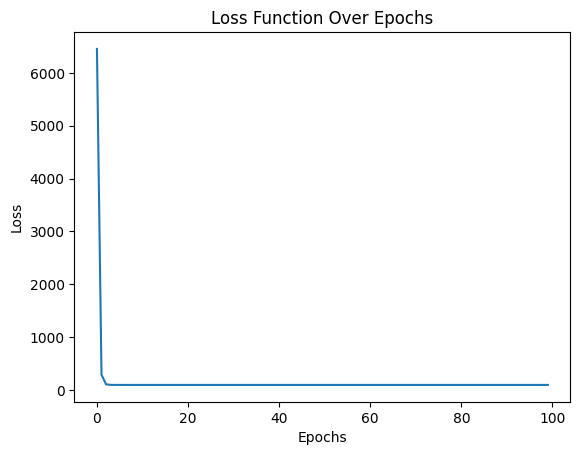

In [25]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()

Linear Regression for mini-batch

In [33]:
x = np.hstack((np.ones((features.shape[0], 1)), features))
y = labels

theta = np.random.rand(x.shape[1])
lr = 0.01
batch_size = 10

losses = []
for _ in range(100):
    epoch_loss = 0
    z = np.hstack((x, y.reshape(-1, 1)))
    np.random.shuffle(z)
    x = z[:, :-1]
    y = z[:, -1]
    for i in range(0, x.shape[0], batch_size):
        y_hat = np.dot(x[i:i+batch_size], theta)
        loss = np.sum((y_hat - y[i:i+batch_size]) ** 2)
        epoch_loss += loss
        dtheta = 2 * np.dot((y_hat - y[i:i+batch_size]), x[i:i+batch_size])
        theta = theta - lr * dtheta
    losses.append((epoch_loss / x.shape[0]))

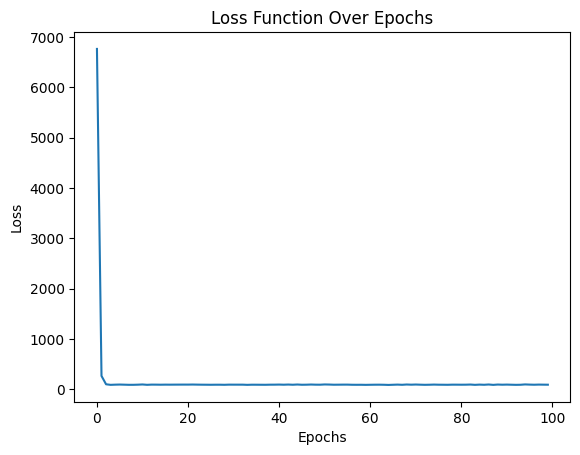

In [34]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()